# Standardizacija

Mnogi modeli mašinskog učenja su osetljivi na vrednosti atributa različitih skala. Nekima od njih zbog ovoga treba više vremena da pronađu rešenje, neki su numerički nestabilniji, a neke je teže interpretirati. `Standardizacija podataka` je transformacija koja pojedinačne atribute modifikuje tako da njihove vrednosti budu centrirane oko nule i sa varijansom jednakoj jedinici. 

Ovaj sveska treba da približi standardizaciju podataka skupa za treniranje i skupa za testiranje na korektan način.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn import preprocessing
from sklearn import model_selection

In [3]:
np.random.seed(1)

Skup podataka koji ćemo standardizovati će biti sintetički. Sastojaće se od 50 tačaka sa `x` vrednostima iz intervala [0, 100] i `y` vrednostima iz uniformne raspodele [0, 1).

In [4]:
x = np.random.randint(0, 100, 50)

In [5]:
y = np.random.rand(50)

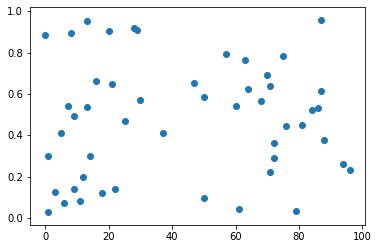

In [6]:
plt.scatter(x, y)
plt.show()

Ovako generisani skup ćemo podeliti na skup za treniranje i skup za testiranje u razmeri 2:1 pozivom funkcije `train_test_split` 

In [7]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.33, random_state = 7)

Dalje ćemo prikazati izdvojene skupove: instance skupa za treniranje će biti obojene plavom bojom, a instance test skupa crvenom bojom.

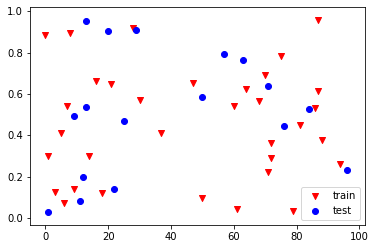

In [8]:
plt.scatter(x_train, y_train, color='red', marker = 'v', label='train')
plt.scatter(x_test, y_test, color='blue', marker = 'o', label='test')
plt.legend(loc='best')
plt.show()

Samo skaliranje podataka se vrši uz pomoć klase `StandardScaler` i njenih metoda  `fit` i `transform`. 

In [9]:
scaler = preprocessing.StandardScaler()

Metodom `fit` se za svaki od atributa izračunavaju srednja vrednost i varijansa. Izračunate vrednosti se mogu dobiti preko svojstava `mean_` i `var_`. Važno je naglasiti da se metod `fit` poziva nad skupom za `treniranje`.

In [10]:
scaler.fit(x_train.reshape(-1, 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaler.mean_

array([45.90909091])

In [12]:
scaler.var_

array([1017.6584022])

Dalje se pozivom funkcije `transform` vrši centriranje atributa i njihovo skaliranje na osnovu izračunatih vrednosti. Ista transformacija se izvršava i nad skupom za treniranje i nad skupom za testiranje.

In [13]:
x_train_correct = scaler.transform(x_train.reshape(-1, 1))

In [14]:
x_test_correct = scaler.transform(x_test.reshape(-1, 1))

Ponovnim prikazom skupova možemo primetiti da su se skale vrednosti duž x-ose promenile, ali da je prostorni raspored instanci ostao isti. 

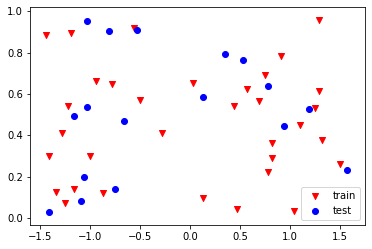

In [15]:
plt.scatter(x_train_correct.flatten(), y_train, color='red', marker = 'v', label='train')
plt.scatter(x_test_correct.flatten(), y_test, color='blue', marker = 'o', label='test')
plt.legend(loc='best')
plt.show()

Nažalost, često se greši pa se podaci koji se nalaze u skupu za treniranje i skupu za testiranje pojedinačno standardizuju. Sledeći primer ilustruje posledice ovakve standardizacije.

Zasebna standardizacija skupa za treniranje.

In [16]:
scaler_train = preprocessing.StandardScaler()
scaler_train.fit(x_train.reshape(-1, 1))
x_train_wrong = scaler_train.transform(x_train.reshape(-1, 1))

Zasebna standardizacija skupa sa testiranje.

In [17]:
scaler_test = preprocessing.StandardScaler()
scaler_test.fit(x_test.reshape(-1, 1))
x_test_wrong = scaler_test.transform(x_test.reshape(-1, 1))

Dalje ćemo prikazati ovako dobijene skupove. Možemo primetiti da su podaci sada drugačije prostorno raspoređeni i da između njih više ne važe isti odnosi. 

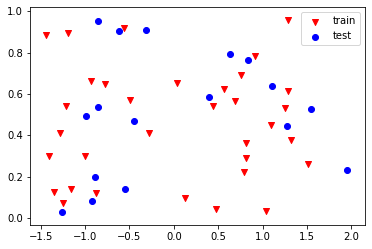

In [18]:
plt.scatter(x_train_wrong.flatten(), y_train, color='red', marker = 'v', label='train')
plt.scatter(x_test_wrong.flatten(), y_test, color='blue', marker = 'o', label='test')
plt.legend(loc='best')
plt.show()

Da bismo se bolje uverili u ovo, prikažimo rezultate standardizacije na jednom grafiku. 

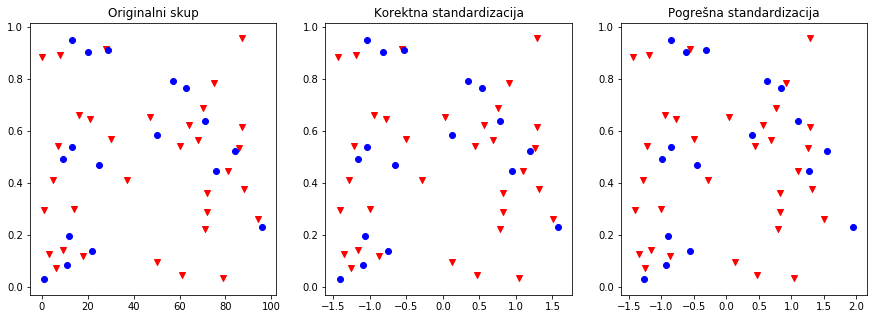

In [19]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Originalni skup')
plt.scatter(x_train, y_train, color='red', marker = 'v')
plt.scatter(x_test, y_test, color='blue', marker = 'o')

plt.subplot(1, 3, 2)
plt.title('Korektna standardizacija')
plt.scatter(x_train_correct.flatten(), y_train, color='red', marker = 'v')
plt.scatter(x_test_correct.flatten(), y_test, color='blue', marker = 'o')

plt.subplot(1, 3, 3)
plt.title('Pogrešna standardizacija')
plt.scatter(x_train_wrong.flatten(), y_train, color='red', marker = 'v')
plt.scatter(x_test_wrong.flatten(), y_test, color='blue', marker = 'o')

plt.show()

Uz standardizaciju postoje i druge transformacije poput `RobustScaler`, `MinMaxScaler`, `Normalizer`, `MinAbsScaler`, `MaxAbsScaler`. 